In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pathlib import Path
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

### <b> Tested out the audio files by plotting out the waveform and mel spectrogram to see the sample audio files.<b>

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/disgust/MEL_dia1000_utt0_negative_DIS.wav')

(88436,)
<class 'numpy.ndarray'>
[ 2.5342699e-04  1.1929779e-04 -6.8567540e-05 ... -2.6109876e-04
 -2.1419297e-04  0.0000000e+00]


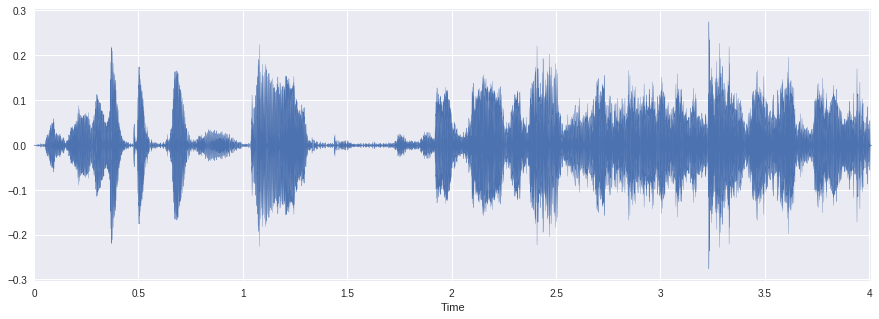

In [47]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
print(data.shape)
print(type(data))
print(data)

### Disgust melspec

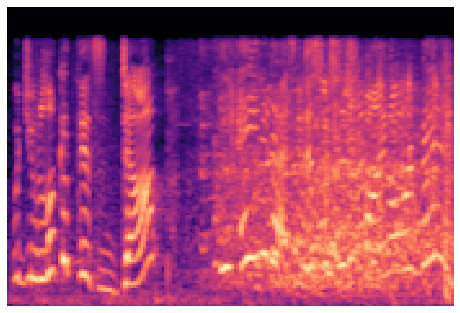

In [48]:
x, sr = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/disgust/MEL_dia1000_utt0_negative_DIS.wav')
S=librosa.feature.melspectrogram(y=x, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

### Happy Melspec

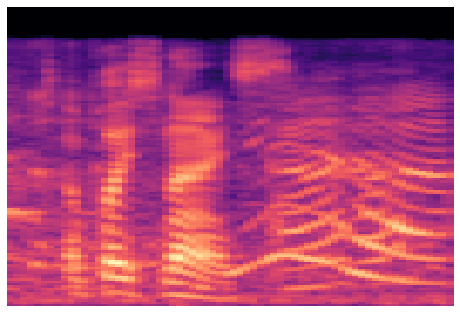

In [49]:
x, sr = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/happy/MEL_dia1001_utt10_positive_HAP.wav')
S=librosa.feature.melspectrogram(y=x, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

### Sad melspec

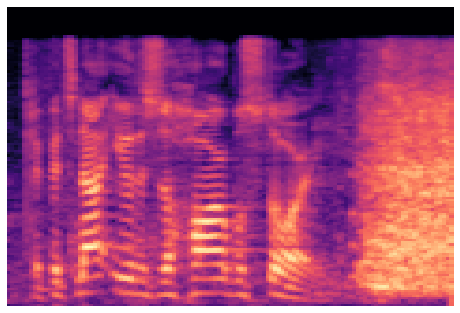

In [50]:
x, sr = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/sad/MEL_dia1001_utt4_negative_SAD.wav')
S=librosa.feature.melspectrogram(y=x, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

# <b> Feature Extraction For Training<b>

### The next step involves extracting the features from the audio files which will help our model learn between these audio files. For feature extraction we make use of the LibROSA library in python which is one of the libraries used for audio analysis. First we make a list called mylist for all the audio samples.


In [0]:
p=Path("/content/drive/My Drive/emotion/Unzipped Files/meld/train/")
dirs= p.glob("*")
labels=[]
mylist=[]
label_dict={"disgust":0,"fear":1,"happy":2,"neutral":3,"sad":4}
for d in dirs:
    label = str(d).split("/")[-1]
    print(label)
    mylist+=os.listdir(d)
    cnt=0
    for audio in d.glob("*.wav"):
      labels.append(label_dict[label])
      cnt+=1
    print(cnt)
    #print(labels)

fear
216
happy
1608
sad
705
disgust
232
neutral
3606


In [0]:
print(type(mylist))
print(len(mylist))
#print(mylist)
print(mylist[1800])
print(mylist[labels])
print(mylist[1500][-7:-4])

# assigning labels to audio files in mylist

In [0]:
feeling_list=[]
for item in mylist:
    if item[-7:-4]=='DIS':
        feeling_list.append('disgust')
    elif item[-7:-4]=='FEA':
        feeling_list.append('fear')
    elif item[-7:-4]=='HAP':
        feeling_list.append('happy')
    elif item[-7:-4]=='NEU':
        feeling_list.append('neutral')
    elif item[-7:-4]=='SAD':
        feeling_list.append('sad')

In [0]:
addlabels = pd.DataFrame(feeling_list)
addlabels[1500:1510]

,0
1500,happy
1501,happy
1502,happy
1503,happy
1504,happy
1505,happy
1506,happy
1507,happy
1508,happy
1509,happy


### Here there are some things to note. While extracting the features, all the audio files have been timed for 12 seconds to get maximum and equal number of features. The sampling rate of each file is 88200*2 keeping sampling frequency constant to get more features which will help classify the audio file.

In [0]:
df_fear = pd.DataFrame(columns=['feature'])
bookmark=0

for y in mylist[:216]:
        
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'fear'+'/'+y,res_type='kaiser_fast', duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        #print(mfccs.shape)
        feature = mfccs
        df_fear.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
df_fear

,feature
0,"[-22.882046166689438, -28.159058630652495, -27..."
1,"[-15.28539244445764, -17.094795289745427, -19...."
2,"[-23.281850038141844, -22.095513522451352, -19..."
3,"[-32.07752645111002, -30.33541631834313, -33.1..."
4,"[-30.591310498288763, -28.94323760185536, -31...."
...,...
211,"[-38.26089507988948, -38.72726483100706, -38.9..."
212,"[-30.01179634207965, -31.997629913836555, -34...."
213,"[-23.18719879949985, -27.069591874105704, -29...."
214,"[-38.8699171629015, -39.86905945385701, -37.87..."


In [0]:
df_happy = pd.DataFrame(columns=['feature'])
bookmark=216

for y in mylist[216:1824]:
        
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'happy'+'/'+y,res_type='kaiser_fast', duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        #print(mfccs.shape)
        feature = mfccs
        df_happy.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
df_sad = pd.DataFrame(columns=['feature'])
bookmark=1824

for y in mylist[1824:2529]:
        
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'sad'+'/'+y,res_type='kaiser_fast', duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        #print(mfccs.shape)
        feature = mfccs
        df_sad.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
df_disgust = pd.DataFrame(columns=['feature'])
bookmark=2529

for y in mylist[2529:2761]:
        
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'disgust'+'/'+y,res_type='kaiser_fast', duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        #print(mfccs.shape)
        feature = mfccs
        df_disgust.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
df_neutral = pd.DataFrame(columns=['feature'])
bookmark=2761

for y in mylist[2761:6367]:
        
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'neutral'+'/'+y,res_type='kaiser_fast', duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        #print(mfccs.shape)
        feature = mfccs
        df_neutral.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
df= pd.concat([df_fear, df_happy,df_sad,df_disgust,df_neutral])
df

In [0]:
df3 = pd.DataFrame(df['feature'].values.tolist())
print(df3.shape)

In [0]:
newdf = pd.concat([df3,addlabels], axis=1)
print(newdf.shape)

In [0]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [0]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

In [0]:
rnewdf=rnewdf.fillna(0)

In [0]:
rnewdf.shape

### upload the dataframe as a csv file

In [0]:
rnewdf.to_csv('emotionspeechversion5.csv',index=False)

# Uploading csv file

In [0]:
df_train=pd.read_csv('/content/drive/My Drive/emotionspeechversion5.csv')

In [0]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0.1
0,-24.781922,-27.818411,-29.617859,-30.374571,-28.175237,-28.060635,-24.801502,-26.655014,-26.638740,-25.789266,-30.106964,-27.781020,-27.257357,-27.001332,-30.878961,-29.090513,-33.793416,-35.236465,-33.531949,-34.496448,-37.158829,-33.925558,-31.509037,-34.664853,-31.555068,-29.644774,-32.802984,-30.089461,-32.569308,-32.326740,-30.869899,-29.272617,-27.978579,-31.494013,-28.901574,-31.123561,-31.236012,-28.992396,-27.120511,-25.862631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
1,-23.349675,-24.725529,-26.384274,-26.811046,-25.568290,-23.882984,-20.354033,-21.147005,-21.579107,-20.774958,-21.472513,-22.323645,-22.617667,-20.669367,-19.878513,-20.492575,-22.894713,-22.296437,-23.989380,-26.409641,-27.103563,-23.974303,-23.374915,-24.138822,-23.953488,-25.714354,-25.352751,-27.500512,-28.123113,-24.757225,-23.788317,-23.694911,-21.327741,-22.506872,-23.004339,-23.330479,-24.864628,-26.248248,-25.348745,-24.043695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
2,-37.707173,-31.864435,-32.123456,-35.041663,-35.139902,-32.920044,-31.657255,-36.394076,-34.533247,-38.161730,-36.042358,-34.554504,-36.859791,-31.844740,-30.995732,-30.320677,-31.095152,-35.060998,-36.384832,-31.767215,-32.914239,-38.467558,-38.448527,-38.628869,-34.840984,-33.450591,-34.727385,-33.468344,-33.711806,-35.459875,-34.689098,-31.485309,-31.591272,-30.542586,-32.698714,-30.560483,-32.660817,-34.213235,-34.149495,-32.041777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
3,-14.423107,-15.725461,-17.295291,-18.639517,-18.661123,-22.425246,-23.951526,-22.478656,-23.071503,-23.132809,-23.183298,-20.677518,-19.514531,-22.029031,-29.106774,-26.282174,-23.808860,-26.060734,-26.318198,-27.516984,-27.900957,-25.817640,-23.307754,-24.255732,-23.606669,-20.378490,-20.299457,-19.193211,-17.284609,-17.410255,-19.808342,-19.639941,-22.244595,-20.177143,-18.268011,-18.209889,-19.243282,-19.459147,-20.210692,-21.855903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
4,-20.268966,-23.836599,-24.461312,-25.537145,-22.885988,-23.256314,-27.546501,-32.295903,-29.850723,-24.954190,-23.206390,-23.163026,-22.501970,-26.897660,-30.302105,-27.253826,-24.239163,-22.214468,-25.634034,-26.234671,-24.222424,-26.796432,-23.016766,-20.765725,-22.715557,-22.941645,-25.267180,-21.591655,-18.880601,-17.768768,-18.610488,-18.805180,-17.729334,-16.113297,-16.233454,-17.415582,-19.474220,-16.703830,-18.963310,-19.385701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,-26.111024,-28.011455,-31.008832,-29.733728,-33.843197,-33.131980,-32.702254,-32.337243,-31.475013,-30.650332,-32.565667,-34.826764,-30.978828,-34.282893,-28.887932,-30.677911,-30.713759,-35.904946,-32.544555,-33.816393,-36.995409,-32.306816,-30.258863,-30.648464,-29.683611,-31.132572,-35.609536,-33.429244,-40.94

In [0]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)
df_train[:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0.1
6073,-32.542234,-34.311060,-36.758301,-37.845083,-34.035922,-32.788276,-37.485946,-36.217529,-33.507729,-36.466818,-34.586151,-30.567415,-31.139970,-35.961085,-34.851137,-33.104030,-34.414904,-35.340743,-36.192751,-31.104071,-31.905734,-33.473013,-34.826073,-37.060244,-34.675336,-37.117759,-34.896852,-39.363552,-36.582312,-31.633901,-33.716735,-36.349918,-35.125992,-34.997490,-34.646617,-36.539979,-35.118227,-36.664120,-35.763172,-34.260892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
4853,-27.207176,-30.494682,-31.787978,-32.391467,-31.713739,-27.828257,-28.286843,-28.088829,-31.389014,-30.073397,-28.342427,-31.107264,-31.679082,-33.934164,-30.231608,-29.127101,-29.157994,-30.934399,-31.087856,-28.061515,-31.814014,-29.728270,-31.243995,-31.647787,-32.384778,-31.948518,-28.056069,-31.133350,-29.479505,-32.618492,-34.141984,-30.450489,-32.324072,-33.148762,-33.825703,-29.823967,-29.783006,-29.578837,-28.676110,-27.526405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
6322,-29.436273,-30.235232,-33.405490,-34.748640,-32.656929,-32.614083,-32.787287,-33.976776,-33.827016,-32.440804,-31.510736,-30.237446,-30.129197,-32.675740,-33.721648,-32.194192,-29.357033,-28.379824,-30.296602,-28.883724,-28.038649,-28.215079,-28.345830,-28.748387,-29.012924,-30.141016,-31.891037,-34.554372,-34.938382,-35.145271,-34.710931,-35.572545,-35.288826,-36.172822,-35.383784,-36.554377,-36.175671,-31.965965,-32.177727,-32.572106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
6298,-31.468762,-31.503122,-33.092801,-33.496322,-28.164624,-30.651235,-33.231677,-32.506083,-29.550387,-33.326517,-37.537033,-34.375290,-35.221315,-28.551916,-30.794681,-36.913789,-32.155188,-31.307965,-34.554509,-35.510077,-30.692689,-28.842595,-30.289318,-30.182449,-28.991617,-29.816648,-31.632274,-24.827080,-25.810297,-24.685326,-23.706700,-21.577054,-21.531557,-21.871801,-24.949326,-22.789490,-22.075960,-23.851849,-27.502639,-25.256636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
5370,-21.717102,-24.844032,-29.071829,-24.984097,-27.289855,-28.516105,-23.240527,-25.717806,-26.201710,-25.546840,-25.843037,-31.853740,-29.786473,-30.337092,-28.871015,-26.470840,-30.272257,-28.845716,-32.754168,-29.167571,-27.498675,-24.826991,-25.427991,-28.956850,-32.018325,-28.692886,-29.900342,-26.558465,-26.406396,-31.839525,-25.069435,-24.691494,-27.243911,-26.857543,-31.109804,-30.407318,-28.321117,-29.038037,-30.115949,-25.661017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
1802,-12.372319,-12.777979,-16.429517,-18.609324,-18.162558,-19.663092,-19.418018,-17.351420,-17.876253,-19.699572,-20.724216,-23.369103,-24.233262,-24.365303,-21.517489,-21.177275,-20.442350,-17.712804,-17.317861,-16.784355,-17.561006,-17.293074,-16.693884,-17.060883,-21.004618,-21.943364,-20.229729,-20.538324,-21.992525,-19.963401,-19.214264,-19.853415,-21.183699,-22.292585,-19.579908,-21.331671,-22.246012,-19.463019,-17.913843,-18.292790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
1208,-25.743007,

In [0]:
trainfeatures = df_train.iloc[:, :-1]

In [0]:
trainlabels=df_train.iloc[:,-1:]

In [0]:
trainlabels.shape

(6367, 1)

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabels)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# similarily I made the test data frame

In [0]:
p=Path("/content/drive/My Drive/emotion/Unzipped Files/meld/val/")
dirs= p.glob("*")
labelval=[]
myvallist=[]
label_dict={"disgust":0,"fear":1,"happy":2,"neutral":3,"sad":4}
for d in dirs:
    label = str(d).split("/")[-1]
    print(label)
    myvallist+=os.listdir(d)
    cnt=0
    for audio in d.glob("*.wav"):
      labelval.append(label_dict[label])
      cnt+=1
    print(cnt)
    #print(labels)

In [0]:
feeling_list=[]
for item in myvallist:
    if item[-7:-4]=='DIS':
        feeling_list.append('disgust')
    elif item[-7:-4]=='FEA':
        feeling_list.append('fear')
    elif item[-7:-4]=='HAP':
        feeling_list.append('happy')
    elif item[-7:-4]=='NEU':
        feeling_list.append('neutral')
    elif item[-7:-4]=='SAD':
        feeling_list.append('sad')

In [0]:
addlabels = pd.DataFrame(feeling_list)

In [0]:
dfval_disgust = pd.DataFrame(columns=['feature'])
bookmark=0
for y in myvallist[:28]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'disgust'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        dfval_disgust.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_sad = pd.DataFrame(columns=['feature'])
bookmark=28
for y in myvallist[28:107]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'sad'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        dfval_sad.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_fear = pd.DataFrame(columns=['feature'])
bookmark=107
for y in myvallist[107:132]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'fear'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        dfval_fear.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_happy = pd.DataFrame(columns=['feature'])
bookmark=132
for y in myvallist[132:313]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'happy'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        dfval_happy.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_neutral = pd.DataFrame(columns=['feature'])
bookmark=313
for y in myvallist[313:830]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'neutral'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        dfval_neutral.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
df8= pd.concat([dfval_fear, dfval_happy,dfval_sad,dfval_disgust,dfval_neutral])

In [0]:
dfval1 = pd.DataFrame(df8['feature'].values.tolist())

In [0]:
newdfval1 = pd.concat([dfval1,addlabels], axis=1)

In [0]:
rnewdfval = newdfval1.rename(index=str, columns={"0": "label"})

In [0]:
from sklearn.utils import shuffle
dfval = shuffle(rnewdfval)

In [0]:
dfval=dfval.fillna(0)

In [0]:
dfval.to_csv('emotionspeechvalidateversion6.csv',index=False)

## Uploading the test features csv file

In [0]:
dfval=pd.read_csv('/content/drive/My Drive/emotionspeechvalidateversion6.csv')

In [0]:
from sklearn.utils import shuffle
dfval = shuffle(dfval)
dfval[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0.1
108,-17.574742,-20.239655,-21.923874,-20.679961,-20.306712,-22.991678,-23.527717,-26.344239,-27.552091,-25.017160,-25.531463,-20.913788,-22.512886,-20.548709,-19.561927,-20.157650,-21.739611,-22.556926,-24.285518,-22.404162,-22.869658,-25.250080,-24.825376,-27.870738,-28.722490,-23.657547,-20.904954,-20.421445,-23.795610,-27.237851,-28.594908,-25.226585,-19.423403,-19.512771,-25.398184,-23.298281,-23.656440,-22.559479,-26.453664,-23.487747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
591,-40.921899,-36.001010,-35.597955,-40.328475,-37.302514,-35.674618,-38.526750,-36.715169,-34.735063,-34.642272,-33.542884,-34.278813,-36.983817,-40.487132,-34.515662,-34.680857,-40.694724,-41.187735,-40.251951,-38.106265,-41.516199,-36.751772,-36.083715,-34.845211,-37.037994,-35.751803,-32.255482,-32.980237,-32.070758,-32.251901,-35.271368,-36.817888,-35.144743,-37.360828,-38.146060,-38.358484,-43.197528,-39.767963,-38.891194,-34.982429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
662,-33.247245,-27.090965,-26.343657,-29.679139,-27.900911,-26.810881,-27.256592,-27.169236,-30.110105,-25.611609,-25.270772,-25.791747,-29.085092,-32.902728,-30.452624,-26.729417,-27.485598,-28.000258,-24.785514,-25.100966,-26.124970,-26.598222,-30.991205,-30.167022,-26.070800,-29.074273,-25.549295,-24.902931,-28.399647,-24.641060,-27.438721,-26.296129,-25.489218,-27.600144,-25.961070,-28.184242,-26.527555,-26.472924,-26.207005,-28.227375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
737,-22.435071,-21.746500,-26.644168,-26.859734,-27.639695,-27.020275,-27.855168,-26.016346,-25.282879,-26.116446,-28.235794,-26.998607,-27.319676,-27.076191,-27.078361,-25.518913,-25.650883,-25.766459,-25.428911,-24.633916,-25.359628,-26.695929,-27.999422,-25.494240,-25.112114,-27.226297,-27.595853,-26.838143,-26.362824,-26.433703,-27.725333,-28.066938,-28.116438,-28.393505,-27.326880,-29.228970,-29.711192,-30.617301,-33.751521,-33.911069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
330,-20.922338,-24.738573,-24.385465,-26.374377,-27.507426,-29.509283,-30.983675,-25.762010,-24.854111,-26.910319,-25.606589,-25.382893,-25.742429,-27.932040,-28.939018,-26.801894,-25.544610,-24.755967,-24.189297,-28.570709,-29.812243,-29.297588,-27.237262,-26.272005,-25.877344,-30.227110,-26.985217,-29.393765,-30.847293,-27.180911,-25.685609,-28.949773,-25.253220,-27.214091,-25.382715,-24.497379,-25.762392,-27.890230,-26.929676,-28.040185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
562,-42.154039,-32.697325,-32.999969,-32.875308,-28.245812,-27.031678,-30.325136,-29.715468,-32.570168,-32.921272,-29.686664,-32.880359,-29.827351,-29.645870,-32.212032,-35.065593,-35.914929,-38.165386,-36.825649,-37.212881,-34.508585,-34.423147,-32.549719,-32.552049,-35.691263,-34.738284,-31.653732,-33.738237,-34.012514,-37.202634,-36.875799,-34.473141,-32.965833,-30.777402,-32.616676,-41.628484,-33.232704,-29.634321,-30.173471,-34.943504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
647,-26.291977,-25.336

In [0]:
testfeatures = dfval.iloc[:, :-1]

In [0]:
testlabels=dfval.iloc[:,-1:]

In [0]:
testlabels.shape

(830, 1)

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_test = np.array(testfeatures)
y_test = np.array(testlabels)
y_test.shape
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6367, 4135)
(830, 4135)
(6367, 5)
(830, 5)


# Changing dimension for the CNN model

In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_testcnn.shape)

(830, 4135, 1)


In [0]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D,Conv2D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, MaxPooling2D, GlobalMaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.callbacks import Callback, TensorBoard, EarlyStopping

# The CNN(1D) model used

In [0]:
model = Sequential()
model.add(Conv1D(256, 5,padding='same',
                 input_shape=(4135,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(AveragePooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu')) 
model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)


In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 4135, 256)         1536      
_________________________________________________________________
activation_21 (Activation)   (None, 4135, 256)         0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 4135, 128)         163968    
_________________________________________________________________
activation_22 (Activation)   (None, 4135, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4135, 128)         0         
_________________________________________________________________
average_pooling1d_6 (Average (None, 516, 128)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 516, 128)         

In [0]:
callback_cnn = keras.callbacks.ModelCheckpoint('version25_weights.h5', monitor='acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period = 1)

In [0]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [0]:
cnn_time = TimeHistory()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [0]:
model.fit(x_traincnn, y_train, batch_size=16, epochs=20, validation_data=(x_testcnn,y_test),callbacks=[callback_cnn,cnn_time])

Train on 6367 samples, validate on 830 samples
Epoch 1/20
6367/6367 [==============================] - 12s 2ms/step - loss: 0.9315 - acc: 0.7030 - val_loss: 1.9256 - val_acc: 0.6060
Epoch 2/20
6367/6367 [==============================] - 11s 2ms/step - loss: 0.8670 - acc: 0.7131 - val_loss: 2.0214 - val_acc: 0.6060
Epoch 3/20
6367/6367 [==============================] - 11s 2ms/step - loss: 0.8386 - acc: 0.7173 - val_loss: 2.1012 - val_acc: 0.6048
Epoch 4/20
6367/6367 [==============================] - 10s 2ms/step - loss: 0.8251 - acc: 0.7244 - val_loss: 2.0505 - val_acc: 0.6036
Epoch 5/20
6367/6367 [==============================] - 11s 2ms/step - loss: 0.8121 - acc: 0.7259 - val_loss: 2.1284 - val_acc: 0.5940
Epoch 6/20
6367/6367 [==============================] - 10s 2ms/step - loss: 0.8030 - acc: 0.7294 - val_loss: 2.1179 - val_acc: 0.6084
Epoch 7/20
6367/6367 [==============================] - 10s 2ms/step - loss: 0.7902 - acc: 0.7346 - val_loss: 2.0750 - val_acc: 0.6060
Epoch 8/

In [0]:
model.evaluate(x_traincnn, y_train)

6367/6367 [==============================] - 3s 432us/step


[0.697617568877235, 0.7766609077028975]

### <b> Saving the model <b>

In [0]:
model_name = '/content/version24_weights.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/version24_weights.h5 


### <b> Loading The model

In [0]:
import keras
from keras.models import load_model

loaded_model= keras.models.load_model('/content/version24_weights.h5')
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 58.19%


### <b> Predicting emotions on test dataset

In [0]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=16, 
                         verbose=1)

830/830 [==============================] - 1s 1ms/step


In [0]:
preds

array([[1.3473071e-01, 7.8260556e-02, 2.4443299e-02, 5.5467135e-01,
        2.0789409e-01],
       [8.4151186e-02, 1.0093266e-01, 1.2048469e-02, 5.5940360e-01,
        2.4346413e-01],
       [4.2412084e-02, 1.6075658e-02, 1.7332824e-05, 7.3945314e-01,
        2.0204173e-01],
       ...,
       [3.3534362e-04, 2.8129488e-03, 2.8842765e-01, 6.8141180e-01,
        2.7012229e-02],
       [5.6276921e-02, 8.8219494e-03, 1.3992684e-07, 8.8877088e-01,
        4.6130132e-02],
       [5.4460894e-02, 2.5510889e-02, 4.2126860e-02, 6.9105542e-01,
        1.8684594e-01]], dtype=float32)

In [0]:
preds1=preds.argmax(axis=1)

In [0]:
preds1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3,
       3, 2, 3, 3, 3, 4, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,

In [0]:
pred1= preds1.reshape(-1,1)
print(pred1.shape)

(830, 1)


In [0]:
y_te= y_test.argmax(axis=1)
y_te=y_te.reshape(-1,1)
print(y_te.shape)

(830, 1)


In [0]:
abc = preds1.astype(int).flatten()

In [0]:
predictions = (lb.inverse_transform((abc)))

In [0]:
preddf = pd.DataFrame({'predictedvalues': predictions})

In [0]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [0]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})

In [0]:
finaldf = actualdf.join(preddf)

In [0]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
disgust,28
fear,25
happy,181
neutral,517
sad,79


In [0]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
disgust,4
happy,26
neutral,765
sad,35


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from mlxtend.plotting import plot_confusion_matrix

In [0]:
# Set the figure size
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
confusion_matrix(y_te, pred1)

array([[  0,   0,   0,  26,   2],
       [  1,   0,   4,  20,   0],
       [  1,   0,   2, 170,   8],
       [  2,   0,  15, 478,  22],
       [  0,   0,   5,  71,   3]])

<Figure size 864x576 with 0 Axes>

# The results were not good and baised for neutral therefore I decided to used spectogram features for classification


#<b> The melspectogram features where not distinguishable and gave a really bad accuracy therefore I decided to use the intensity spectogram

##<b> I made intensity spectograms for all the emotions using Parselmouth library. https://github.com/YannickJadoul/Parselmouth

In [3]:
pip install praat-parselmouth

     |████████████████████████████████| 9.0MB 6.3MB/s 


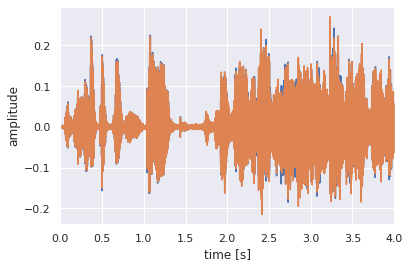

In [4]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("/content/drive/My Drive/emotion/Unzipped Files/meld/train/disgust/MEL_dia1000_utt0_negative_DIS.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

# Made Intensity spectograms for audio files both train and validation. And I performed Image Classiification

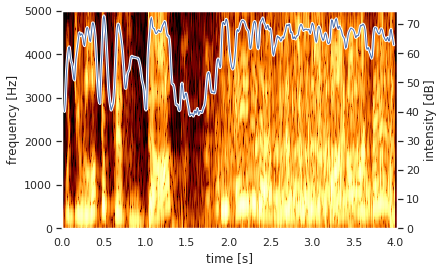

In [5]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

## <b> To avoid biased results I considered only 800 samples of neutral and happy audio files

In [6]:
from keras.preprocessing import image

Using TensorFlow backend.


## <b> The Intensity folder contains 2 folders of train and val, each having 5 emotion folders with images

In [7]:
p=Path("/content/drive/My Drive/Intensity/Train/")

image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Sad":0,"Fear":1,"Neutral":2,"Happy":3,"Disgust":4}
label2emotion = {0:"Sad",1:"Fear",2:"Neutral",3:"Happy",4:"Disgust"}

dirs=p.glob("*")
for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(label)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.png"):
        img = image.load_img(img_path,target_size=(256,256))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)

Sad
700
Disgust
232
Neutral
800
Fear
207
Happy
796
.DS_Store
0


In [8]:
p=Path("/content/drive/My Drive/Intensity/Val/")

valimage_data = []
vallabels = []

#Optional
image_paths = []

label_dict = {"Sad":0,"Fear":1,"Neutral":2,"Happy":3,"Disgust":4}
label2emotion = {0:"Sad",1:"Fear",2:"Neutral",3:"Happy",4:"Disgust"}

dirs=p.glob("*")
for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(label)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.png"):
        img = image.load_img(img_path,target_size=(256,256))
        img_array = image.img_to_array(img)
        valimage_data.append(img_array)
        vallabels.append(label_dict[label])
        cnt += 1
        
    print(cnt)

Disgust
28
Happy
181
Neutral
517
Sad
79
Fear
25
.DS_Store
0


In [0]:
import random
random.seed(10)

In [0]:
X = np.array(image_data)
Y = np.array(labels)

XTest =np.array(valimage_data)
YTest = np.array(vallabels)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
XTest,YTest = shuffle(XTest,YTest,random_state=2)

#Normalisation
X = X/255.0
XTest=XTest/255.0

In [0]:
def drawImg(img,label):
    plt.title(label2emotion[label])
    plt.imshow(img)
    plt.show()

## <b> show the sample images of classes

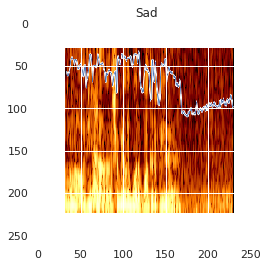

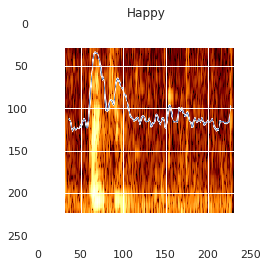

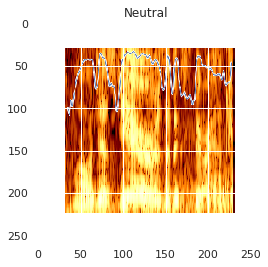

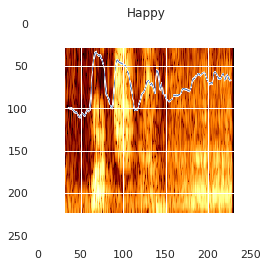

In [12]:
for i in range(1,5):
    drawImg(X[i].reshape(256,256,3),Y[i])

In [0]:
import random
np.random.seed(10)

In [0]:
train_img_gen = image.ImageDataGenerator(
    rescale = 1/255.0,
    
)
val_img_gen = image.ImageDataGenerator(
    rescale = 1/255.0,
    
)

In [84]:
train_gen = train_img_gen.flow_from_directory(
    '/content/drive/My Drive/Intensity/Train',
    batch_size = 16,
    target_size=(256,256),
    shuffle=True

)
val_gen = val_img_gen.flow_from_directory(
    '/content/drive/My Drive/Intensity/Val',
    target_size=(256,256),
    shuffle=True
)

Found 2735 images belonging to 5 classes.
Found 830 images belonging to 5 classes.


In [85]:
for x, y in train_gen:
  print(x.shape, y.shape)
  break

(16, 256, 256, 3) (16, 5)


In [86]:
print(train_gen.class_indices)
print(val_gen.class_indices)

{'Disgust': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4}
{'Disgust': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4}


In [0]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.layers import Dense
from keras.layers import BatchNormalization

# <b> The CNN model (2D) used for classification of images

In [88]:
model = Sequential()
model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=(256,256,3), activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))  
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(256, 256,..., activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", 

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 128)      

In [0]:
from keras.callbacks import Callback, TensorBoard, EarlyStopping

In [0]:
tb = TensorBoard('./logs')
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=5)

In [0]:
model.fit_generator(train_gen,epochs=20, callbacks=[tb, es],validation_data=val_gen)

## <b> Saving weights

In [219]:
model_name = '/content/drive/My Drive/intensity_weights.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/intensity_weights2.h5 


## <b> Loading weights on the validation generator

In [0]:
import keras
from keras.models import load_model

loaded_model= keras.models.load_model("/content/drive/My Drive/intensity_weights.h5")
# preds = loaded_model.predict(XTest, 
#                          batch_size=16, 
#                          verbose=1)
preds = loaded_model.predict(val_gen)

In [161]:
model.evaluate_generator(val_gen)

[0.4356027682143522, 0.800000011920929]

## <b> Seeing the results on validation generator

In [245]:
import keras
from keras.models import load_model

loaded_model= keras.models.load_model('/content/drive/My Drive/intensity_weights.h5')
print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#score = loaded_model.evaluate(XTest, YTest, verbose=0)
score = loaded_model.evaluate(val_gen)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
26/26 [==============================] - 6s 239ms/step
acc: 80.00%


In [234]:
preds

array([[0.05290133, 0.04819651, 0.29152027, 0.29863596, 0.30874595],
       [0.09607439, 0.07833432, 0.2987142 , 0.28434572, 0.24253143],
       [0.05777463, 0.05679537, 0.2741652 , 0.27025613, 0.3410087 ],
       ...,
       [0.0791472 , 0.06666929, 0.309468  , 0.30037582, 0.2443397 ],
       [0.02943426, 0.03281661, 0.24782571, 0.25799942, 0.43192407],
       [0.06291585, 0.06100556, 0.275538  , 0.26995936, 0.33058122]],
      dtype=float32)

In [0]:
preds1=preds.argmax(axis=1)

In [236]:
preds.shape

(830, 5)

In [237]:
preds1

array([4, 2, 4, 2, 2, 4, 3, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 3, 2,
       4, 4, 4, 2, 3, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 4, 2, 2, 2, 3, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 3, 2, 4,
       2, 2, 4, 2, 3, 2, 4, 4, 3, 4, 2, 4, 2, 3, 4, 2, 4, 4, 2, 2, 2, 4,
       4, 3, 2, 3, 4, 2, 2, 3, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 4, 3, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 3, 2, 2, 4,
       2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4,
       2, 3, 4, 2, 4, 2, 3, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       2, 3, 4, 4, 4, 3, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 3, 3, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 3, 2, 2, 4,
       2, 2, 3, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 3,
       2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 3, 2, 3, 4,
       2, 4, 4, 4, 2, 2, 2, 3, 2, 2, 3, 4, 2, 2, 4,

In [238]:
pred1= preds1.reshape(-1,1)
print(pred1.shape)

(830, 1)


In [239]:
y_te= YTest
y_te=y_te.reshape(-1,1)
print(y_te.shape)

(830, 1)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from mlxtend.plotting import plot_confusion_matrix

In [241]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
confusion_matrix(y_te, pred1)

array([[  0,   0,  37,  11,  31],
       [  0,   0,  11,   2,  12],
       [  0,   0, 238,  50, 229],
       [  0,   0,  87,  19,  75],
       [  0,   0,  12,   3,  13]])

<Figure size 864x576 with 0 Axes>

In [0]:
label2emotion = {0:"Sad",1:"Fear",2:"Neutral",3:"Happy",4:"Disgust"}

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
   
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_title(title, pad=20)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

<Figure size 864x576 with 0 Axes>

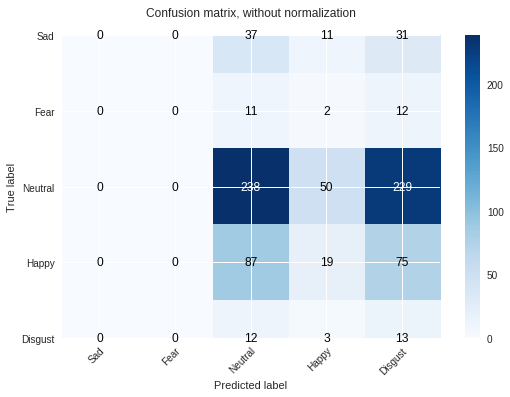

In [252]:
# Set the figure size
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
# Calculate the confusion matrix
plot_confusion_matrix(y_te,pred1,np.array(list(label2emotion.values())))

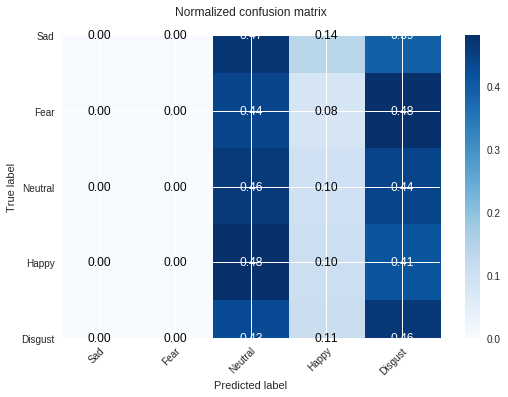

In [253]:
plot_confusion_matrix(y_te,pred1,np.array(list(label2emotion.values())),normalize=True)

In [0]:
classes = os.listdir('/content/drive/My Drive/emotion/Unzipped Files/meld/val')
imp_dict = {}
for cls in classes:
  files = os.listdir('/content/drive/My Drive/emotion/Unzipped Files/meld/val'+'/'+cls)
  for file in files:
    data = {}
    # file is and audio_id(name of the audio) iske corressponding jo img h tere pass wo read and normalized kar
    img = image.load_img('/content/drive/My Drive/Intensity/Val/'+cls+"/"+file.replace(".wav",".png"),target_size=(256,256))
    img_array = image.img_to_array(img)
    img_array =img_array/255.0
    img_array=img_array.reshape(1,256,256,3)
    pred = label2emotion[np.argmax(model.predict(img_array), axis=1)[0]]
    data['actual'] = cls
    data['predicted'] = pred
    imp_dict[file] = data

In [0]:
imp_dict

In [218]:
len(imp_dict)

830

In [0]:
import pickle 

In [0]:
with open('predictions.pkl','wb') as sp: 
  pickle.dump(imp_dict,sp)

In [187]:
val_gen.class_indices

{'Disgust': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4}

In [0]:
label2emotion=dict([(value,key) for key,value in val_gen.class_indices.items()])